<a href="https://colab.research.google.com/github/pinkee2611/AI/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


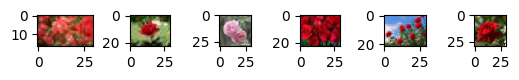

In [2]:
import matplotlib.pyplot as plt
from keras.models import load_model
from matplotlib.image import imread
folder = '/content/drive/MyDrive/ten_hoa/'
for i in range(6):
  plt.subplot(10,6,i+1)
  filename=folder+'rose ('+str(i)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.show()

In [3]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/ten_hoa/'
photos,labels=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('apricot'):
    output=1.0
  if file.startswith('daisy'):
    output=2.0
  if file.startswith('iris'):
    output=3.0
  if file.startswith('lotus'):
    output=4.0
  if file.startswith('rose'):
    output=5.0  
  img=load_img(folder+file, target_size=(30,40))
  photo=img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('hoa_photos.npy',photos)
save('hoa_labels.npy',labels)

(50, 30, 40, 3) (50,)


In [4]:
import numpy as np
x_train = np.load('/content/hoa_photos.npy')
y_train = np.load('/content/hoa_labels.npy')
print(x_train.shape)
print(y_train.shape)
x=x_train
y=y_train
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,100)

(50, 30, 40, 3)
(50,)


In [5]:
from keras.backend import flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
#32 lần
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lần
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 10, 64)         0

In [7]:
model.save('hoa.h5')

In [10]:
model_1=load_model('hoa.h5')

1/1 [==============================] - 0s 261ms/step


'hoa mai'

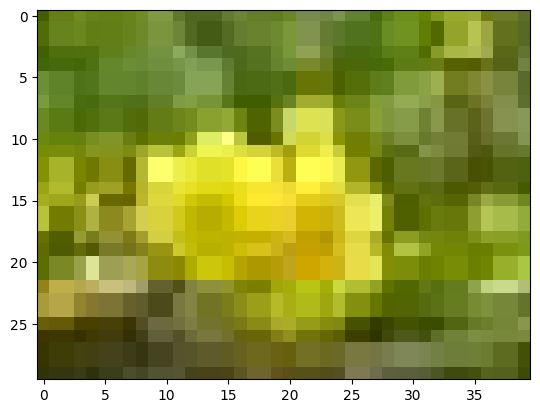

In [11]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1:'hoa mai',2:'hoa cuc',3:'hoa lan',4:'hoa sen',5:'hoa hong'}
img = load_img("/content/drive/MyDrive/ten_hoa/apricot (2).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]